# The Forced Damped Pendulum
@author João Henrique de Sant'Ana (joao.henrique.santana@usp.br, https://github.com/joaodesantana)

_University of São Paulo, Institute of Physics, São Paulo, SP, Brazil_. (Dated: April 20, 2020)

## Abstract
   In this brief work, we investigated the dynamics of a forced damped pendulum. We demonstrated that the dynamics of this system is chaotic for certain values of the forcing element. For that, we explored the phase space, the Poincaré map, calculated the Lyapunov exponent and made an approximation of the Feigenbaum number.

## Introduction
   In Henri Poincaré’s words ” ...it may happens that small differences in the initial conditions produce very great ones in the final phenomena...”, this is the most elementary description of a chaotic movement. Physical systems that have this characteristic can be described by sets of equations of the type:
   
$$
   \begin{cases}\tag{1}
        &\frac{dx_{1}}{dt} = F_{1}(x_{1},\dotsm,x_{n}) \\
        & \hspace{0.3cm}\vdots \\
        &\frac{dx_{n}}{dt} = F_{n}(x_{1},\dotsm,x_{n}),
    \end{cases}
$$

where $ x_ {i}= x_ {i}(t) $, $i = (1, \dotsm, n) $, are the variables of interest and $ F_ {1} \dotsm F_ {n} $ are nonlinear functions with respect to $ x_ {i} $. In other words, they are deterministic phenomena, but they have an attribute of unpredictability with respect to the initial conditions $ x_ {1} (0) \dotsm x_ {n} (0) $. The dynamics of a pendulum with damping and periodic force is governed by such a system of equations. Nonlinear dynamical systems have been studied for a long time, but had a _boom_ when Edward Lorenz has presented some equations for the dynamics of the atmosphere.

## Theoretical Description
   A simple pendulum consists of a body of negligible dimensions of mass $ m $ suspended by a wire of length $ l $ of negligible mass in a gravitational field of acceleration $ \vec{g} $. We consider a viscous frictional force proportional to the velocity of the body, that is, $ \mathcal{F} _ {a} = \frac{1}{2}bv^{2} $, that is called Rayleigh's dissipation function. The configuration is described in the next figure. Now, we are ready to introduce an external force, (This external force will be identified as a torque.), that has a sinusoidal shape over time and that will have a period of $T =2\pi/\Omega_{d}$, in which $\Omega_{d}$ is angular frequency. We can describe our physical system using the generalized coordinate $\theta $, since the problem has one degree of freedom. The equation of $\textit{Euler-Lagrange}$, (The Lagrangian has units of energy and $\theta $ has no dimension, that is, the dimension of each term of the equation is [m $\cdot N $], torque dimension.), will be given by:
 
$$
    \begin{equation}\tag{2}
         \frac{d}{dt}\left(\frac{\partial\mathcal{L}}{\partial\dot{\theta}}\right) - \frac{\partial\mathcal{L}}{\partial\theta} + \frac{\partial\mathcal{F}_{a}}{\partial\dot{\theta}} = \tau_{ext}(t). 
    \end{equation}
$$

$\tau_{ext}(t)$ is external torque, the Lagrangian can be written as:

$$
\begin{equation}\tag{3}
      \mathcal{L}= \frac{1}{2}ml^2\dot{\theta}^{2} - mgl(1 - cos(\theta)).
\end{equation}
$$

Thus, the equation of motion for $ \theta $ coordinates takes the form:

$$
     \begin{equation}\label{eq:equação_pendulo_provisorio} \tag{4}
         ml^{2}\ddot{\theta} + bl^{2}\dot{\theta} + mglsin(\theta) = \tau_{d}sin(\Omega_{d}t),
     \end{equation}
$$

where $b$, $\tau_{d}$ and $\Omega_{d}$ are constant. We can divide the equation $\eqref{eq:equação_pendulo_provisorio}$  by the factor $ml^{2}$ and we call $\gamma=b/m$, $\omega_{0}^{2}=g/l$, $F=\tau_{d}/ml^{2}$. So we have:

$$
\begin{equation}\label{eq:equação_pendulo} \tag{5}
        \ddot{\theta} + \gamma\dot{\theta} + \omega_{0}^{2}sin(\theta) = Fsin(\Omega_{d}t).
\end{equation}
$$

## Numerical simulation
For understanding the dynamics of the pendulum, we have to observe how it reacts to certain changes in the parameters of the equation $\eqref{eq:equação_pendulo}$, in addition to the initial conditions. The quantities $ g $, $ l $ and $ m $ will always be constant, since they are properties of the pendulum or the Earth, so our parameters of interest will be $ \gamma $, $ F $ and $ \Omega_ {d} $. With that, we will reorganize our equation by calling $ \omega = \dot {\theta} $, $ \gamma = 1/q $, $ \phi = \Omega_ {d}t $ and we will assume that the natural frequency is $ \omega_ {0} ^ {2} = g/l = 1 $. We find:

$$
\begin{equation}\label{eq:completa}
        \begin{cases}\tag{6}
        &\dot{\omega}= -\frac{1}{q}\dot{\theta} -sin(\theta) + Fsin(\phi)\\
        &\dot{\theta}=\omega \\
        & \dot{\phi} = \Omega_{d}.
        \end{cases}
    \end{equation}
$$

This is the set of equations described
above. We will use the following notation:

$$
\begin{equation}\label{eq:notação}\tag{7}
        \begin{cases}
        & w = \Omega_{d}\\
        & y = \theta\\
        & z = \dot{\theta}.
        \end{cases}
\end{equation}
$$

Therefore, the function that we will integrate in time is:

$$
\begin{equation}
\begin{cases}\label{eq:equação_pêndulo_numerica}\tag{8}
        &\dot{z}= -\frac{1}{q}z -sin(y) + Fsin(wt)\\
        &\dot{y}=z
\end{cases}
\end{equation}
$$

We are ready to perform our numerical simulation. We solve the equation $\eqref{eq:equação_pêndulo_numerica}$ via the classic fourth order Runge–Kutta method. In fact, we solve only the first two equations of $\eqref{eq:completa}$, since $\Omega_ {d} $ is a constant quantity, that is, we do not want to have a force with different frequencies at each instant $ t $. Well, basically all of our analysis was done taking $ q = 2 $, $ \Omega_ {d} = 2/3 $, initial conditions $ \theta(0) = 0 $ and $ \dot{\theta}(0) = 0 $.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



In [2]:
def g(t,y,z,F,q,w):
    """ (float) -> (float)
    """

    return -z/q -np.sin(y) + F*np.sin(w*t)  

def rungekutta(N,h,y0,z0,F,q,w,value):
    """ (int, float, bool) -> (np.array)
    
    N: number of elements in the time list
    h = time list interval
    y0 = inicial position
    z0 = inicial angular velocity
    F = force
    q = viscosity term
    w = angular frequency of force F
    value: If True, y is between -pi and pi. 
    
    """
    t = np.arange(0,N+1,h)          #time list
    y, z = np.zeros((2,N+1))
    y[0] = y0                       #initial conditions
    z[0] = z0
    for i in range(N):
        k1y = h*z[i]                        #k1 for y
        k1z = h*g(t[i],y[i],z[i],F,q,w)     #k1 for z           
        k2y = h*(z[i] + k1z/2)
        k2z = h*g(t[i] + h/2, y[i] + k1y/2, z[i] + k1z/2,F,q,w)
        k3y = h*(z[i] + k2z/2)
        k3z = h*g(t[i] + h/2, y[i] + k2y/2, z[i] + k2z/2,F,q,w)
        k4y = h*(z[i] + k3z)
        k4z = h*g(t[i] + h, y[i] + k3y, z[i] + k3z,F,q,w)
        y[i+1] = y[i] + (k1y + 2*k2y + 2*k3y + k4y)/6       #rungekutta for y
        z[i+1] = z[i] + (k1z + 2*k2z + 2*k3z + k4z)/6       #rungekutta for z

        if value == True:       #condition to keep the theta value between -pi and pi
            if y[i+1] > np.pi:
                y[i+1] = y[i+1] - 2*np.pi
            if y[i+1] < -np.pi:
                y[i+1] = y[i+1] + 2*np.pi
    
    return t, y, z


## Results and Analysis

### Phase Space and Poincaré Map
To explore the dynamics of the system, let's build what we call the phase space diagram, which is the space where our variables of interest live, in this case it will be a diagram given by $ (\theta, \dot {\theta}) $. We can analyze several characteristics of the system through this diagram, for example, for conservative systems, the trajectories in that space never cross for different energy values or, for other systems, we can have trajectories that end up at a single point, this point is called attractor, which is the case of a purely damped pendulum ending in the position $ \theta = 0 $ and angular velocity $ \dot {\theta} = 0 $ for long times. Our problem consists of a periodic force and then we can take a stroboscopic photograph of the phase space at each period of the force. This succession of photos is what we call the Poincaré map. If the Poincaré map has only one point, we conclude that the system returns to the same place in the phase space and thus the movement is not chaotic. A Poincaré map of chaotic dynamics consists of several points. We plot both diagrams to values of $ 0\leq F \leq1 .50 $. Important to remember that all the figures of the phase space and the Poincaré map were made with the initial condition $(\theta(0),\dot{\theta}(0)) = (0,0)$.

For non-zero values of $ F $ the system is always chaotic, but we can see that for low values of $ F $ the dynamics behaves approximately regular, however in the region of $ F = 1.20 $ and $ F = 1.50 $ th system demonstrates its unique chaotic character. We call the set of points when $ F = 1.20 $ or for $ F = 1.50 $ the chaotic attractor, because this surface in the phase space does not depend on the initial conditions (try $(\theta(0),\dot{\theta}(0)) = (0,2)$). The curious thing about this structure is that it has a fractal property (if you zoom, you will see a pattern repeating).

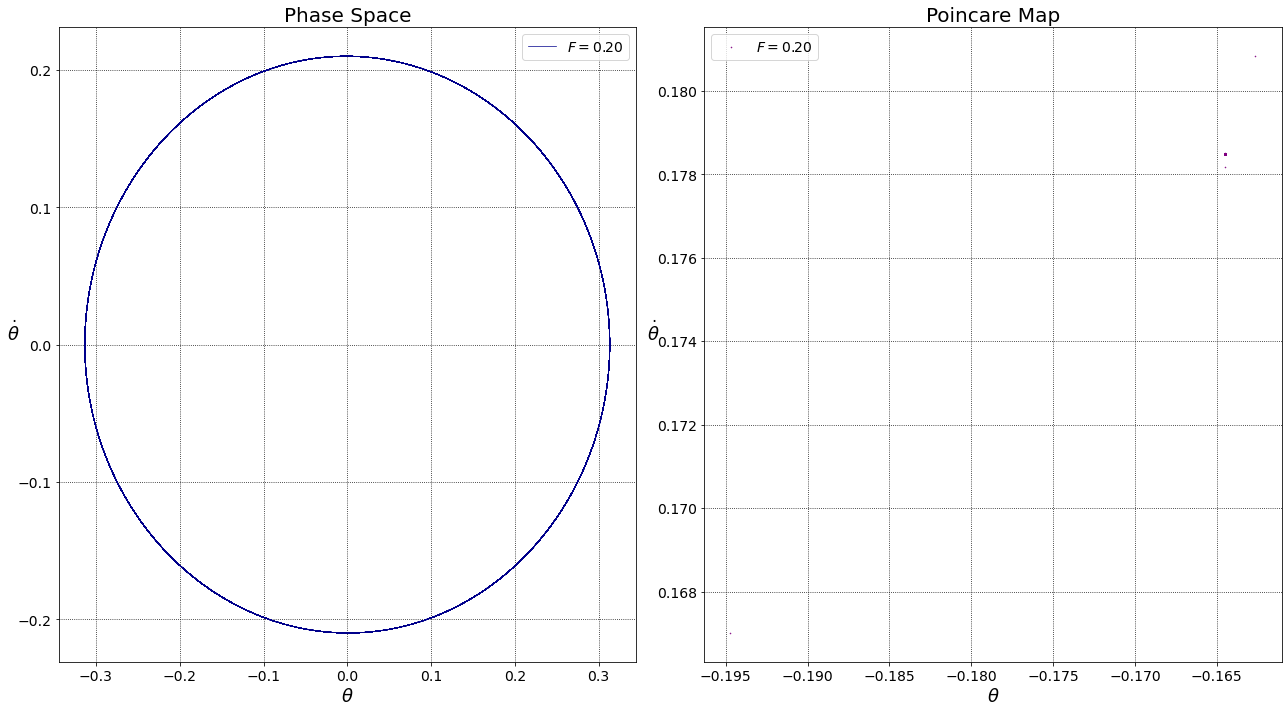

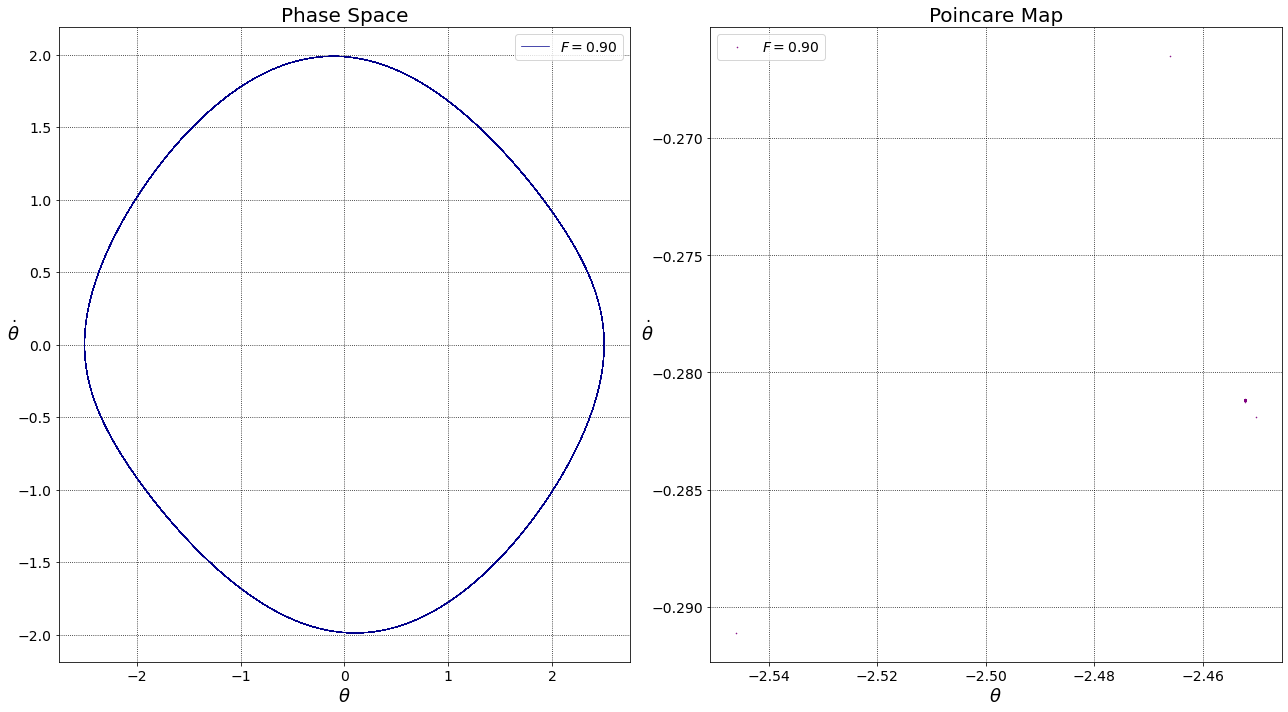

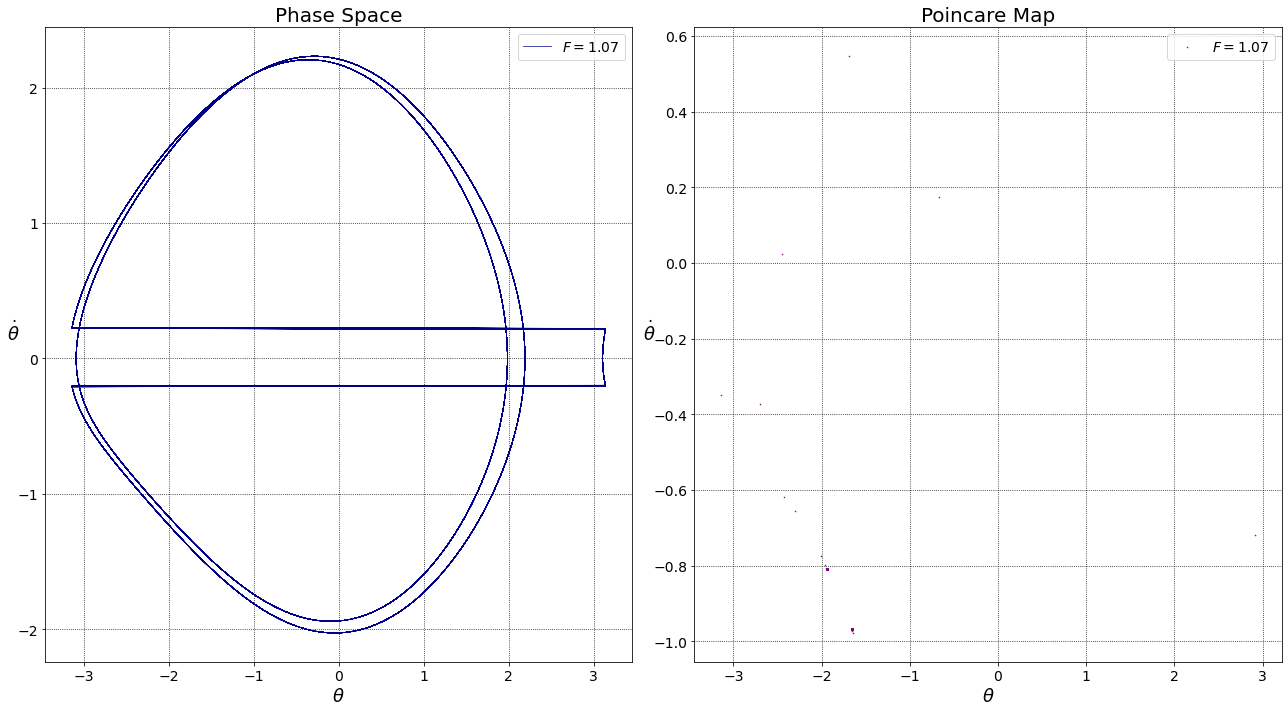

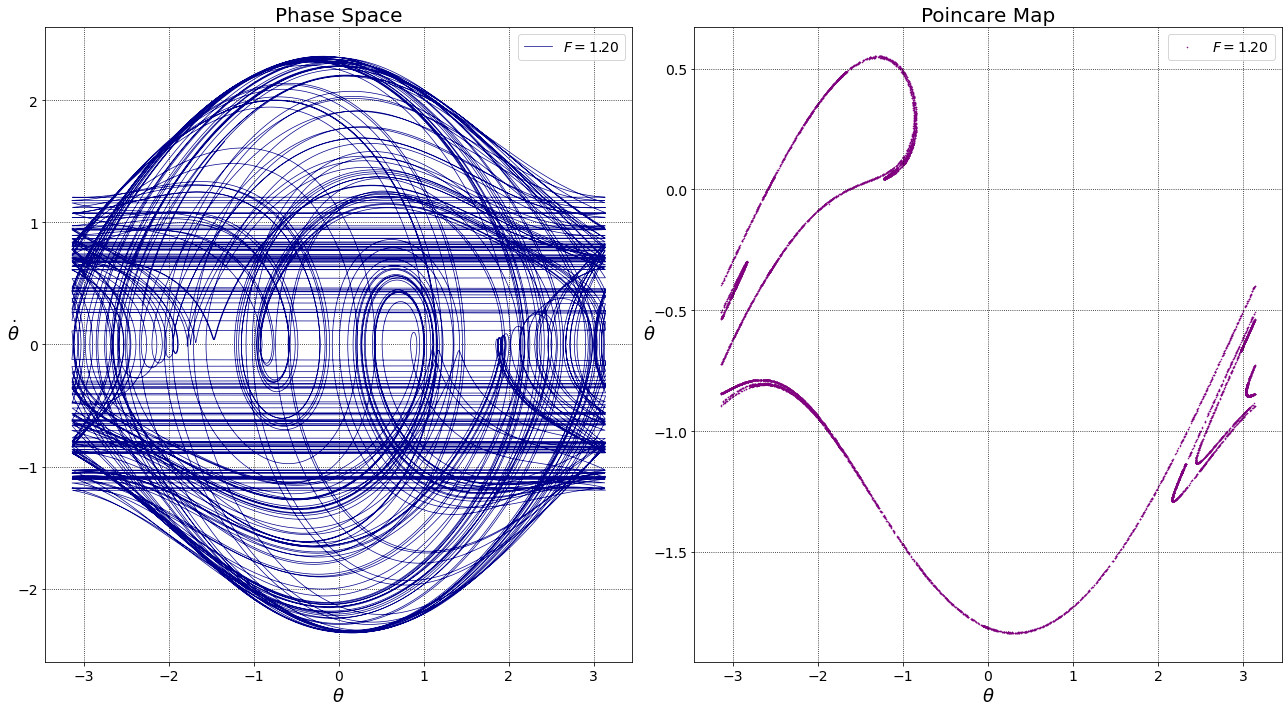

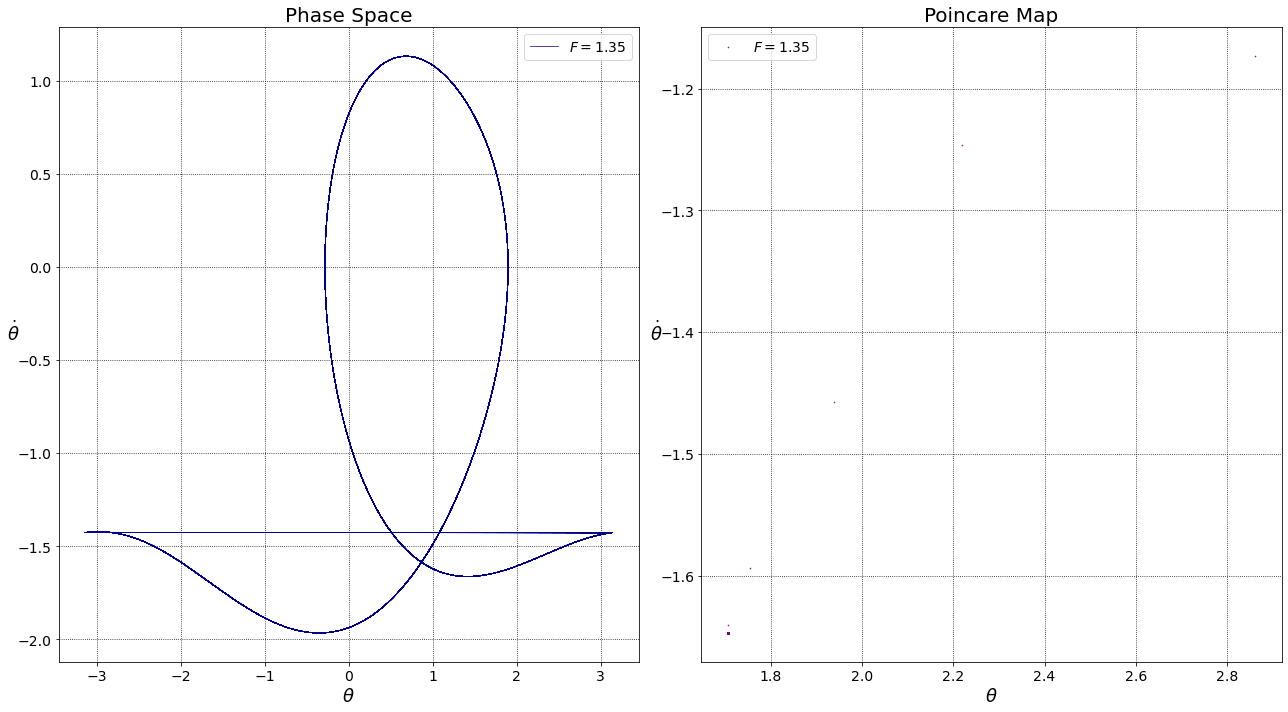

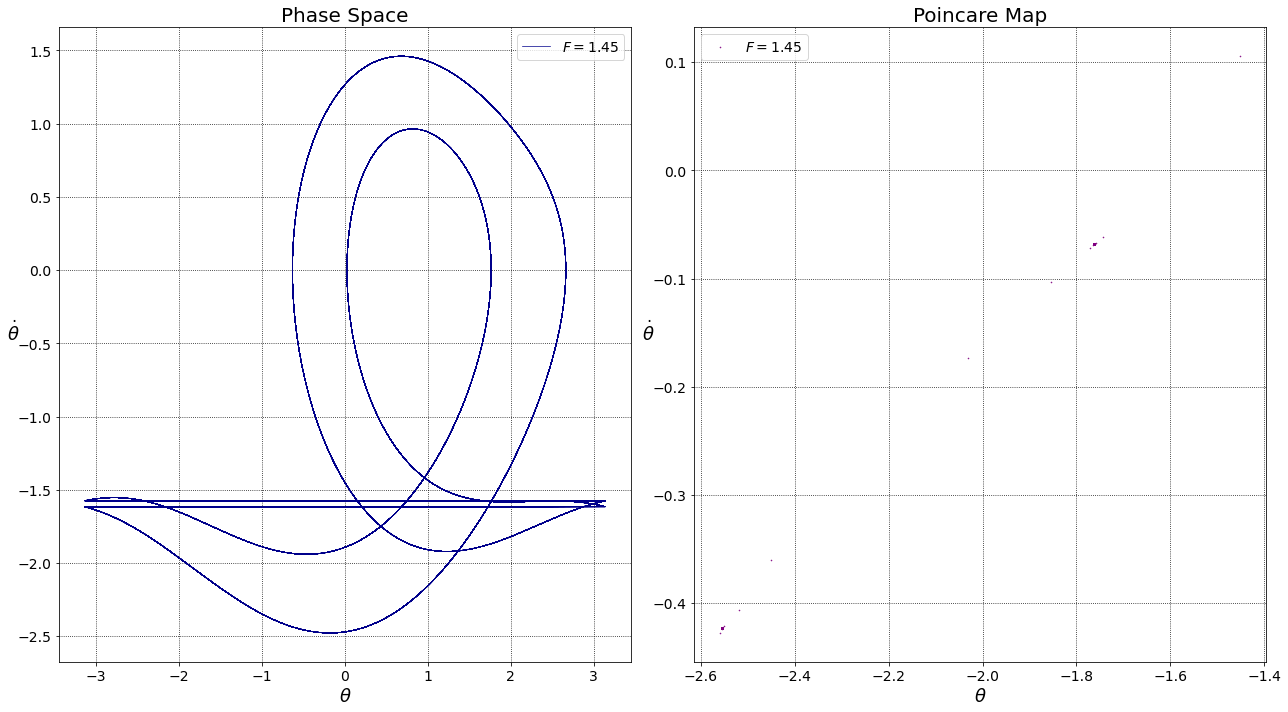

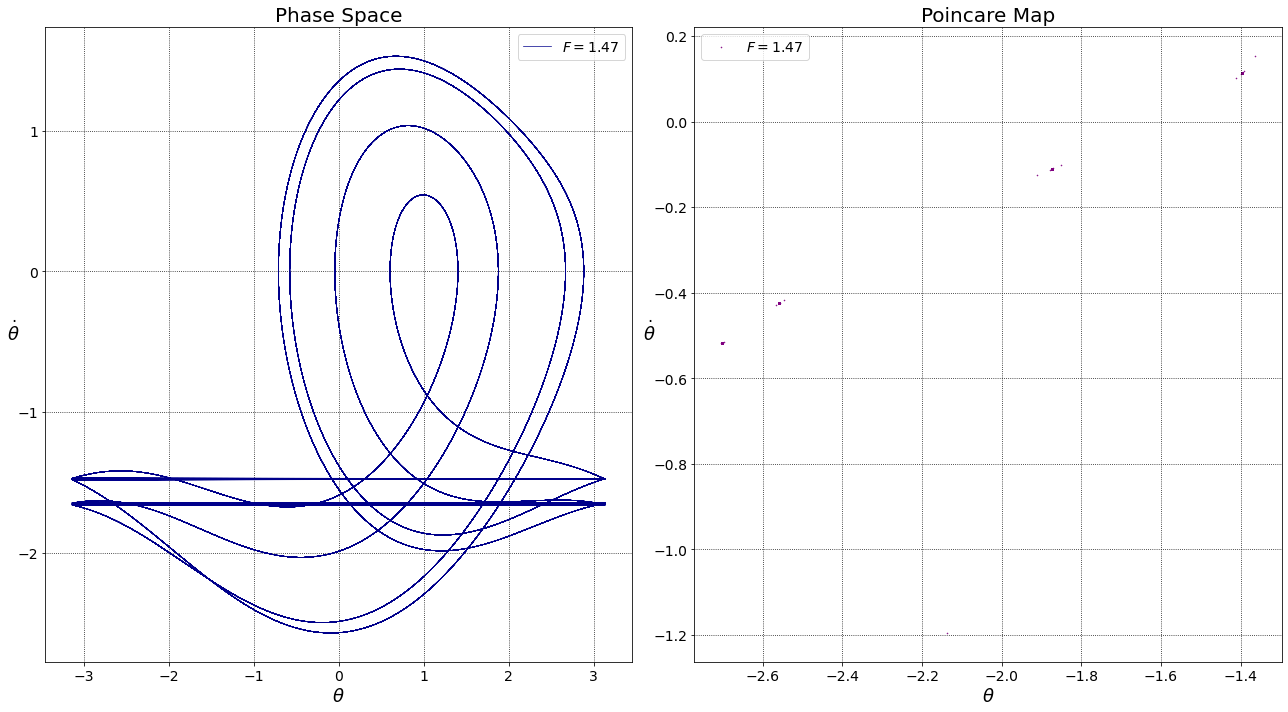

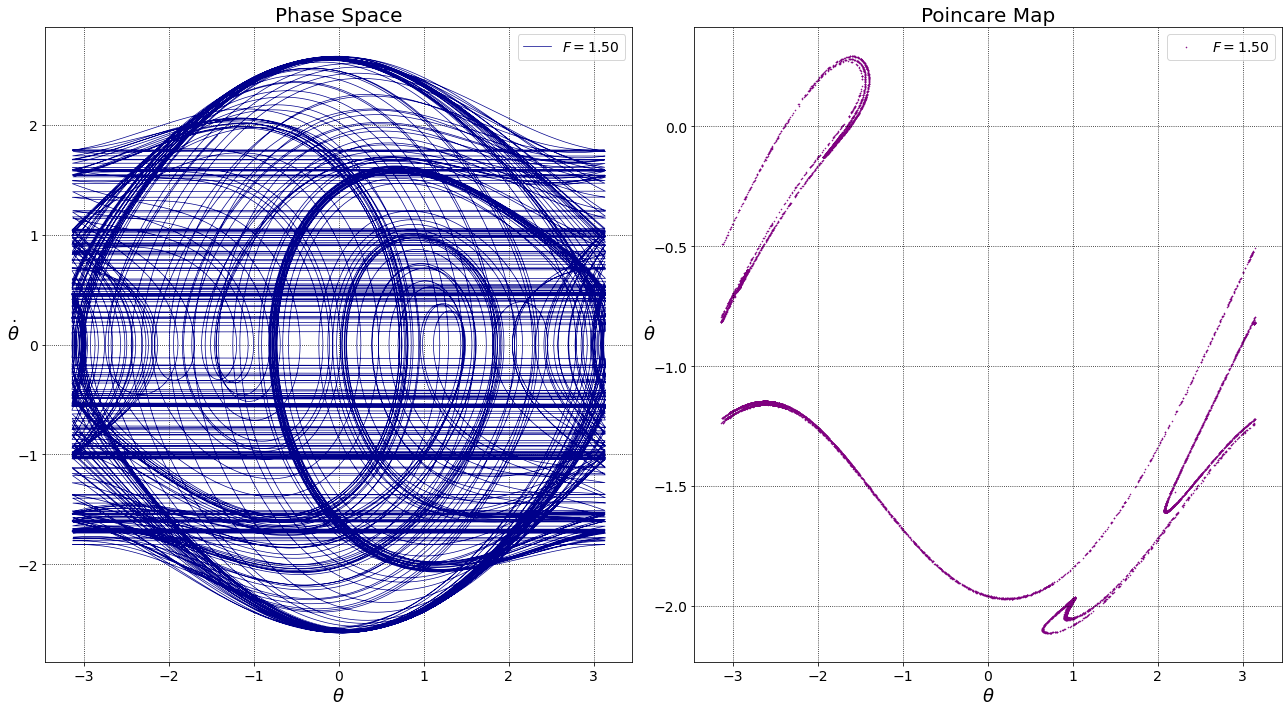

In [8]:
for F in [0.2, 0.9, 1.07, 1.20, 1.35, 1.45, 1.47, 1.5]:   
    N, h, y0, z0, q, w = 200000, 0.01, 0, 0, 2, 2/3       #q = 2 and omega_d = 2/3
    t, y, z = rungekutta(N, h, 0, 0, F, q, w, True)
    
    #---phase-space-----
    f = plt.figure(figsize=(18, 10))
    ax1 =  f.add_subplot(1, 2, 1 )
    ax1.plot(y[100000:],z[100000:],'darkblue',label='$F=%.2f$' %F,linewidth =0.7)   #no transient
    plt.grid(linestyle='dotted',color='black')
    plt.xlabel(r'$\theta$',fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel(r'$\dot{\theta}$',fontsize=18,rotation=0)
    plt.title('Phase Space',fontsize=20)
    plt.legend(fontsize=14)
    
    #---poincare-map-----
    poincare_y = list()
    poincare_z = list()
    for i in range(10000):
        h = 0.01*2*np.pi/w
        N = 100                                        #1 period of the forcing element
        t, y, z = rungekutta(N,h,y[-1],z[-1],F,q,w,True)
        poincare_y.append(y[-1])                     #we add the last element in the list a
        poincare_z.append(z[-1])                     #we add the last element in the list b
    
    ax2 = f.add_subplot(1, 2, 2 )
    ax2.scatter(poincare_y, poincare_z,label='$F=%.2f$' %F,color='purple',s=0.3)       #plot
    plt.grid(linestyle='dotted',color='black')
    plt.xlabel(r'$\theta$',fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel(r'$\dot{\theta}$',fontsize=18,rotation=0)
    plt.title( "Poincare Map",fontsize=20)
    plt.legend(fontsize=14)
    plt.tight_layout()
    #plt.savefig('img/phase_space/phase_space_no_transient%.2f.png'%F,dpi=300)
    
    plt.show()

### Bifurcation diagram

An interesting phenomenon that can be seen in the phase space diagram for $ F = 1.35 $, $ F = 1.45 $ and $ F = 1.47 $ is that for each force we have twice as many lines in the phase space. This is observed because when the nature of the pendulum tends to go into a state of chaoticity, the period doubles as a response of the forcing element. This effect is called cascade of period-doubling and we can see it in a bifurcation diagram $(F,\theta)$. From this graph we can find the Feigenbaum constant defined by:
$$
\begin{equation}\tag{9}
        \delta = \lim_{n\to\infty} \frac{F_{n-1}-F_{n-2}}{F_{n} - F_{n-1}},
\end{equation}
$$

in which, $ F_{n} $ are the values of the force where there is a bifurcation. Therefore, we can approximate the constant by calculating the first $ \delta_{1} $, 

$$
\begin{equation}\tag{10}
        \delta_{1}= \frac{1.45 - 1.42}{1.47 - 1.45} = 1.5.
\end{equation}
$$

This value is a very rough approximation, since the value of $ \delta = 4.669 ...$

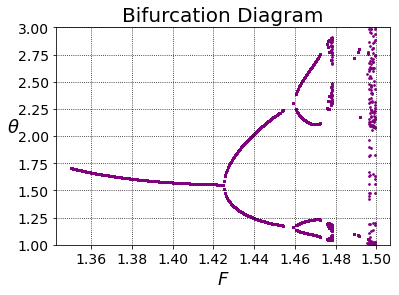

In [4]:
force = np.arange(1.35,1.5,0.0005)
f = list()
theta = list()

for F in force:
    N, y0, z0, q, w = 200000, 0, 0, 2, 2/3
    h = 0.01*2*np.pi/w
    t, y, z = rungekutta(N,h,0,0,F,q,w,True)     #non-transient state
    for i in range(100):                         #evolves the system of 1 period 100 times
        N = 1000
        h = 0.001*2*np.pi/w                      #reset the h interval
        t, y, z = rungekutta(N,h,y[-1],z[-1],F,q,w, True)
        theta.append(y[-1])                          #we add the last element of y in a
        f.append(F)                                  #we add the corresponding force


plt.scatter(f,theta,color='purple',s=3)
plt.ylim([1,3])
plt.grid(linestyle='dotted',color='black')
plt.xlabel(r'$F$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel(r'$\theta$',fontsize=18,rotation=0)
plt.title("Bifurcation Diagram",fontsize=20)
plt.show()


### Lyapunov exponent

We can use another mathematical device to show that the movement is sensitive to the initial conditions. We think in two points, or two pendulums, the initial conditions of these two pendulums will be $ (\theta_ {1}(0), \dot{\theta_{1}}(0)) $ and $ (\theta_ {2} (0), \dot{\theta_{2}} (0)) $, with $|{\theta_{1}(0) - \theta_{2}(0)}| \approx 0 $ and $|\dot{\theta}_{1}(0) - \dot{\theta}_{2}(0)| \approx 0 $, That is, two pendulums in the same neighborhood. We can look at how the quantity $ \Delta\theta = |\theta_{1}(t) - \theta_{2}(t)| $ evolves in time. We plot the graphs on a log scale for $ F = 0.2 $ and $ F = 1.20 $ using $ q = 2 $ and $ \Omega_{d} = 2/3 $ and initial conditions: $ (\theta_{1} (0),\dot{\theta_ {1}} (0)) =(0, 2) $, $ (\theta_{2}(0), \dot{\theta_{2}} (0) ) = ( 0.001, 2.001) $, with an order difference of $ 10^{- 3} $ in the initial conditions. 

We see that in the next figure the difference between the magnitude $\Delta\theta $ falls as a function of time, and therefore we are in a non-chaotic regime, that is, the movement is not unpredictable. Now,for the second plot , we notice that the path difference between the two pendulums $ 1 $ and $ 2 $ increases, so we are in the chaotic regime in its representation. The intereting thing about this is that we can take an average of $ \Delta \theta $ and fit an exponential function, 
$$
\begin{equation}\tag{11}
        \Delta\theta \approx e^{\lambda t},
\end{equation}
$$
and so we make a fit like:
$$
\begin{equation}\tag{12}
        F(t) = ae^{-\lambda_{l}t} + c.
\end{equation}
$$

$\lambda_{l}$ is the Lyapunov exponent. We observed a phase transition between the two regimes quantified by the lyapunov exponent with its sign change. In fact, the interpretation of the graphs tells us that the sign exponent represents the rate of divergence in the path difference of the two pendulums. For the negative case in the chaotic regime and for the positive case in the non-chaotic regime.

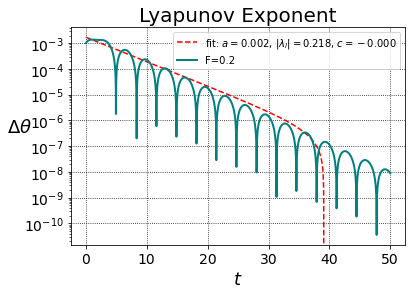

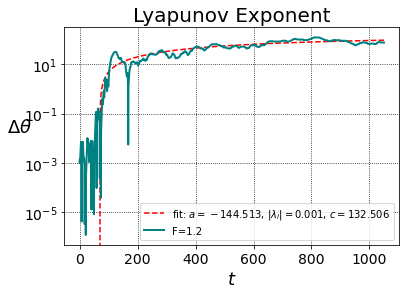

In [3]:
import warnings
warnings.filterwarnings("ignore")

def func(x, a, b, c):
    return a * np.exp(-b * x) + c    #fit

for F in [0.2, 1.2]:
    q, w, h, N = 2, 2/3, 0.01, 200000
    t, y, z = rungekutta(N,h,0,2,F,q,w,False)     #initial condition (0,2), F = 1.2
    theta1 = y
    t, y, z = rungekutta(N,h,0.001,2.001,F,q,w,False) #initial condition (0.0001, 2.0001), F = 1.2 
    theta2 = y
    theta = abs(theta2 - theta1) #\Delta\theta                                  
    T = 105000
    
    if F == 0.2:
        popt1, pcov1 = curve_fit(func,t[0:T],theta[0:T])  #fit
        plt.plot(t[0:5000],func(t[0:5000],*popt1),'r--',label='fit: $a=%5.3f$, $|\lambda_{l}|=%5.3f$, $c=%5.3f$' % tuple(popt1) )
        plt.plot(t[0:5000],theta[0:5000],color='teal',label='F=0.2',linewidth=2)
        plt.grid(linestyle='dotted',color='black')
        plt.xlabel(r'$t$',fontsize=18)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.ylabel(r'$\Delta\theta$',fontsize=18,rotation=0)
        plt.yscale('log')
        plt.title("Lyapunov Exponent",fontsize=20)
        plt.legend(fontsize=14,prop={'size': 10})
        #plt.savefig('img/lyapunov_exponent/exponent0.2.pdf',dpi=300)
        plt.show()
    if F == 1.2:
        popt2, pcov2 = curve_fit(func,t[0:T],theta[0:T])  #fit
        plt.plot(t[0:T],func(t[0:T],*popt2),'r--',label='fit: $a=%5.3f$, $|\lambda_{l}|=%5.3f$, $c=%5.3f$' % tuple(popt2) )
        plt.plot(t[0:T],theta[0:T],color='teal',label='F=1.2',linewidth=2)
        plt.grid(linestyle='dotted',color='black')
        plt.xlabel(r'$t$',fontsize=18)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.ylabel(r'$\Delta\theta$',fontsize=18,rotation=0)
        plt.yscale('log')
        plt.title("Lyapunov Exponent",fontsize=20)
        plt.legend(fontsize=14,prop={'size': 10})
        #plt.savefig('img/lyapunov_exponent/exponent1.2.pdf',dpi=300)
        plt.show()

### Energy
Finally, we can understand how the energy value of the oscillator behaves for each value of the force element in time. First, we were able to observe the effect of the transient and the force at the same time, and second to see that, with the increase in the amplitude of the force, the system responds with various frequency values. Thus, from of $ F = 0.5 $, we found that only the effect of force matters for the value of energy. For the purely damped oscillator (dissipative system) we can fit an exponential,
$$
    \begin{equation}\tag{13}
        E(t) = ae^{-\gamma t} + c,
    \end{equation}
$$

and we find the value for the exponent, $  \gamma = 0.097 $, in which represents the energy decay rate and that is very close to the value we give for $ \gamma = 1/10 $. Here we use $q=10$ and $\Omega_{d}=2/3$. With this number we can calculate the decay time,
$$
    \begin{equation}\tag{14}
        \tau_{dec}=\frac{1}{\gamma},
    \end{equation}
$$
that will be $ \tau_{d} \approx 10.3 $. In the figure, we can see that this value is in the region of energy close to $0.2 $.

#### Comment
The system energy is:
$$
\begin{equation}\tag{15}
E = ml^2\dot{\theta}^{2} + mgl(1-cos(\theta)).
\end{equation}
$$

For the energy plot, we divide everything by $ ml^{2} $ and set $ g/l = 1 $, hence:

$$
\begin{equation}\tag{16}
 E' = \dot{\theta}^{2} + (1-cos(\theta))
\end{equation}
$$

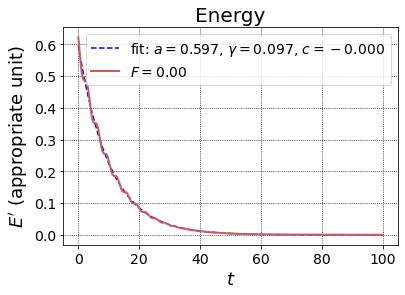

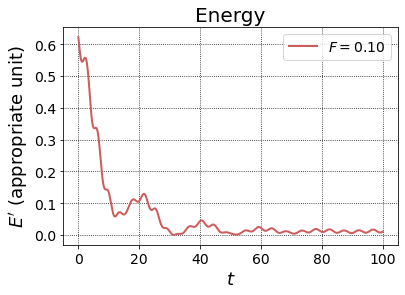

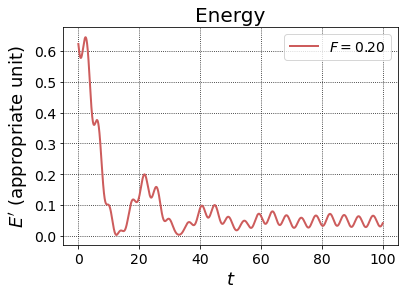

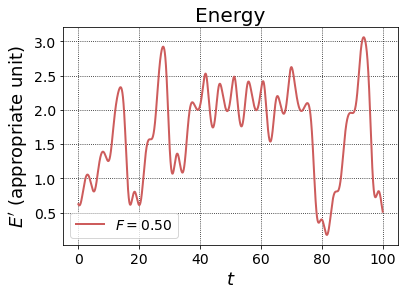

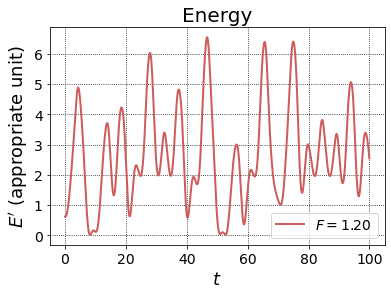

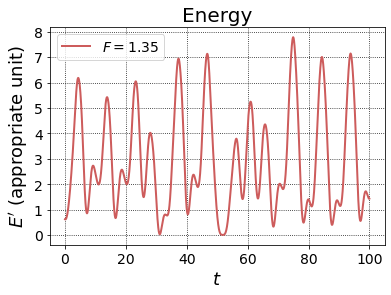

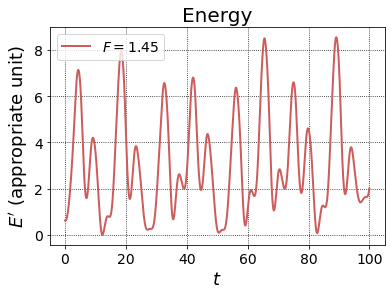

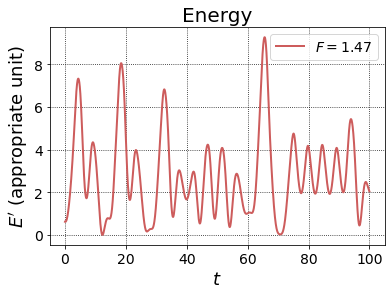

In [7]:
def func(x, a, b, c):       #fit only for F = 0
            return a * np.exp(-b * x) + c
    
for F in [0,0.1,0.2,0.5, 1.2,1.35,1.45,1.47]:      
    q, w, h, N = 10, 2/3, 0.01,100000              #q = 10 
    t, y, z = rungekutta(N,h,-0.5,1,F,q,w,True) #rungekutta for initial condition (-0.5, 1)
    k = z**2/2                   #kinetic energy
    p = 1 - np.cos(y)              #potencial energy
    E = k + p                    #total energy

    if F==0:
        popt, pcov = curve_fit(func,t[0:10000],E[0:10000])
        plt.plot(t[0:10000],func(t[0:10000],*popt),'b--',label='fit: $a=%5.3f$, $\gamma=%5.3f$, $c=%5.3f$' % tuple(popt) )
        
    plt.plot(t[0:10000],E[0:10000],label='$F=%.2f$' %F,color='indianred',linewidth =2)
    plt.grid(linestyle='dotted',color='black')
    plt.xlabel(r'$t$',fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel(r"$E'$ (appropriate unit)",fontsize=18)
    plt.title("Energy",fontsize=20)
    plt.legend(fontsize=14)
    #plt.savefig('img/energy/energy%.2f.pdf'%F,dpi=300)
    plt.show()


## Conclusion
From these 4 subsections, we demonstrate that the system is rich in properties for all values of $ 0\leq F \leq 1.50 $. The system oscillates between in a high chaotic and low chaotic state as the value of F increases until it reaches $ F = 1.50 $, using $ q = 2 $ and $ \Omega_{d} = 2/3 $. The value of energy is closely related to the value of $ F $ and that for very low values of $ F $ the factor $ \gamma $ is a characteristic factor of the system.